In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from GRDECL2VTK import *

### Exampel 1 - Load grid data with perm and porosity

In [2]:
#Model=GeologyModel(filename='./ExampleData/Simple3x3x1.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple20x20x5_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_Flat_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/Simple10x10x3_FlatCross_Fault.grdecl')
#Model=GeologyModel(filename='./ExampleData/40X48x1_3fatults.grdecl')
#Model=GeologyModel(filename='./ExampleData/snarkgrid.grdecl')
Model=GeologyModel(filename='./ExampleData/dome.grdecl')
#Model=GeologyModel(filename='./ExampleData/pillar_36x48.grdecl')
#Model=GeologyModel(filename='./ExampleData/Johansen.grdecl')
#Model=GeologyModel(filename='./ExampleData/Norne.GRDECL')

Model.GRDECL2VTK()
Model.Write2VTU()

[Input] Reading ECLIPSE/PETREL file "./ExampleData/dome.grdecl" ....
     Grid Type=CornerPoint
     Grid Dimension(NX,NY,NZ): (20 x 20 x 4)
     NumOfGrids=1600
     NumOfKeywords=11
     Reading Keywords [SPECGRID] 
     [Warnning] Unsupport keywords[PORO]
     [PERMX]      [PERMY]      [PERMZ] .....Done!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 12800
     NumOfCells 1600
     .....Done!
[Output] Writing "Results/dome.vtu" Paraview file....Done!


[FaultProcess] Found 7 faults.
Added 1 new intersection pts
[FaultProcess] Domain is splitted as 6 polygons.


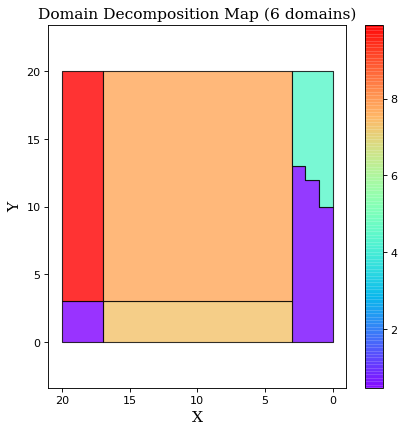

[Output] Writing "Results/dome.vtu" Paraview file....Done!


In [3]:
Model.decomposeModel()
Model.Write2VTU()

### Create cartesian grid -- Write new GRDECL file -- Test output

In [4]:
# Create cartesian Grid and associated GRDECL file
Model=GeologyModel()
Nxyz=8
Model.buildCartGrid([10.0,10.0,10.0],[Nxyz,Nxyz,Nxyz])

# Write GRDECL file for this cartesian model
FilePath="ExampleData/"
Basefilename="Cart00"
FileExtension="GRDECL"
filename=FilePath+Basefilename + "." + FileExtension
Model.writeCartGrid_forGRDECL(filename)

# Test output file by reading it
Model=GeologyModel(filename="ExampleData/Cart00.GRDECL")
Model.GRDECL2VTK()
Model.Write2VTU()

     Grid Type=Cartesian Grid
     Grid Dimension(NX,NY,NZ): (8 x 8 x 8)
     NumOfGrids=512
[Output] Writing "ExampleData/Cart00.GRDECL" GRDECL file.....done
[Input] Reading ECLIPSE/PETREL file "ExampleData/Cart00.GRDECL" ....
     Grid Type=Cartesian Grid
     Grid Dimension(NX,NY,NZ): (8 x 8 x 8)
     NumOfGrids=512
     NumOfKeywords=9
     Reading Keyword 1 [DIMENS]      [PERMX]      [PERMY]      [PERMZ] 
     [Warnning] Unsupport keywords[PORO]
.....Done!
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 4096
     NumOfCells 512
     .....Done!
[Output] Writing "Results/Cart00.vtu" Paraview file....Done!


### Create corner point grid 

In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from GRDECL2VTK import *
import numpy as np, math

FilePath="ExampleData/"
Basefilename="CPGrid00"
FileExtension="GRDECL"

Model=GeologyModel()
Model.fname=FilePath+Basefilename + "." + FileExtension

Nxyz=Nx=Ny=Nz=4
divisor=2
xmax=1
ymax=xmax
zmax=xmax/divisor
Nz//=divisor
Nz=3
opt={'disturbed':False,'flat':True}
Model.buildCPGGrid([xmax,ymax,zmax],[Nx,Ny,Nz],opt,faultDrop=0.15)


Model.GRDECL2VTK()
Model.Write2VTU()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     Grid Type=CornerPoint Grid
     Grid Dimension(NX,NY,NZ): (4 x 4 x 3)
     NumOfGrids=48
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 384
     NumOfCells 48
     .....Done!
[Output] Writing "Results/CPGrid00.vtu" Paraview file....Done!


In [32]:
G=Model.GRDECL_Data
self=G

[FaultProcess] Found 1 faults.
[FaultProcess] Domain is splitted as 2 polygons.


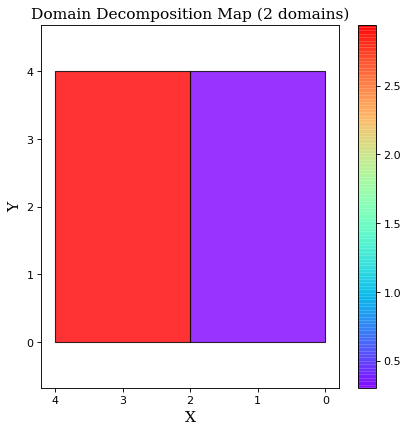

[Output] Writing "Results/CPGrid00.vtu" Paraview file....Done!


In [37]:
Model.decomposeModel()
Model.Write2VTU()

In [ ]:
Model.Write2VTP()

### Process corner point grid for TPFA calculations

In [151]:
FilePath="ExampleData/"
Basefilename="CPGrid00"
FileExtension="GRDECL"
# Construct X,Y,Z nodal coordiantes array from COORD and ZCORN
# Model.buildCPGGrid([xmax,ymax,zmax],[Nx,Ny,Nz],faultDrop=0.15)
Model.processGRDECL()
import numpy as np
np.set_printoptions(precision=4)
G=Model.GRDECL_Data
self=G
# axis=['NX','NY','NZ']
# size=[Nx,Ny,Nz]
# print(axis,size)
# for i in range(2*Nz+2):
#     print('i,X[:,:,i] :',i,'\n',G.X[:,:,i])

Processing regular faces
Found  80  new regular faces
findFaults
Found 4 faulted stacks



In [152]:
self.dZ2

array([10.8, 27. , 43.2, 59.4, 10.8, 27. , 43.2, 59.4, 10.8, 27. , 43.2,
       59.4, 10.8, 27. , 43.2, 59.4, 10.8, 27. , 43.2, 59.4, 10.8, 27. ,
       43.2, 59.4, 10.8, 27. , 43.2, 59.4, 10.8, 27. , 43.2, 59.4, 10.8,
       27. , 43.2, 59.4, 10.8, 27. , 43.2, 59.4])

In [140]:
checked=self.a
checked2=self.b
print('size: ',checked.size//2)
for i in range(checked.size//2):
    print(i+1,checked[i,:]+1,checked2[i,:]+1)


size:  40
1 [3. 8.] [3. 8.]
2 [28. 33.] [28. 33.]
3 [53. 56.] [81. 84.]
4 [68. 71.] [111. 114.]
5 [68. 71.] [111. 114.]
6 [ 98. 101.] [141. 144.]
7 [ 98. 101.] [141. 144.]
8 [128. 131.] [156. 159.]
9 [173. 178.] [173. 178.]
10 [198. 203.] [198. 203.]
11 [ 8. 13.] [ 8. 13.]
12 [33. 38.] [33. 38.]
13 [56. 59.] [84. 87.]
14 [71. 74.] [114. 117.]
15 [71. 74.] [114. 117.]
16 [101. 104.] [144. 147.]
17 [101. 104.] [144. 147.]
18 [131. 134.] [159. 162.]
19 [178. 183.] [178. 183.]
20 [203. 208.] [203. 208.]
21 [13. 18.] [13. 18.]
22 [38. 43.] [38. 43.]
23 [59. 62.] [87. 90.]
24 [74. 77.] [117. 120.]
25 [74. 77.] [117. 120.]
26 [104. 107.] [147. 150.]
27 [104. 107.] [147. 150.]
28 [134. 137.] [162. 165.]
29 [183. 188.] [183. 188.]
30 [208. 213.] [208. 213.]
31 [18. 23.] [18. 23.]
32 [43. 48.] [43. 48.]
33 [62. 65.] [90. 93.]
34 [77. 80.] [120. 123.]
35 [77. 80.] [120. 123.]
36 [107. 110.] [150. 153.]
37 [107. 110.] [150. 153.]
38 [137. 140.] [165. 168.]
39 [188. 193.] [188. 193.]
40 [213. 218.]

In [141]:
checked=self.dZ2
print('size: ',checked.shape)
for i in range(checked.shape[2]):
    print(i+1,"\n",checked[:,:,i]*1)


size:  (10, 3, 4)
1 
 [[ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]
 [ 5.4 10.8 16.2]]
2 
 [[21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]
 [21.6 27.  32.4]]
3 
 [[37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]
 [37.8 43.2 48.6]]
4 
 [[54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]
 [54.  59.4 64.8]]


In [ ]:
self.ZCORN

In [ ]:
qsdfghjkl

### Interactive Visualization directly from Jupyter Notebook (using pyvista and ITK)

In [ ]:
try:
    import pyvista as pv
except ImportError:
    import warnings
    warnings.warn("No vtk notebook viewer module pyvista loaded.")

In [ ]:
FilePath=r"Results/"
FileExtension="vtp"
filename=FilePath+Basefilename + "." + FileExtension

mesh = pv.read(filename)
mesh

In [ ]:
pl = pv.PlotterITK()
pl.add_mesh(mesh, scalars='PORO', smooth_shading=True)
pl.show()

In [ ]:
mesh.plot(scalars="PORO",show_edges=True, notebook=True)

### Exampel 2 - Load grid data and adding any custom field

In [ ]:
Model=GeologyModel(filename='./ExampleData/dome.grdecl')

TempData=Model.LoadCellData(varname="TEMP",filename='./ExampleData/dome_Temperature.txt')
Model.GRDECL2VTK()
Model.Write2VTU()